# Gradient Descent: Multilayered Perceptron (MLP)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
x = np.linspace(-1, 4).reshape(50,1)

In [3]:
def generate_sample(x):
    return np.array([np.sin(n) + np.random.normal(10, 0.1) for n in x])

In [4]:
y = generate_sample(x)

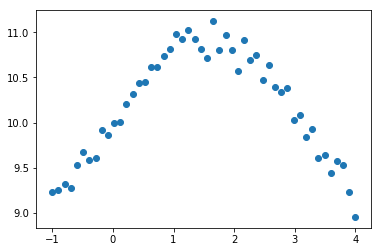

In [5]:
plt.scatter(x, y);

In [6]:
# initialize layer 0
W0 = np.random.random((1,2))
B0 = np.random.random((1,2))
# initialize layer 1
W1 = np.random.random((2,1))
B1 = np.random.random((1,1))

In [7]:
for e in range(3):
    L0 = (x @ W0) + B0
    L0 = np.maximum(L0, 0, L0)
    y_hat = (L0 @ W1) + B1
    
    mse = ((y - y_hat) ** 2).mean()
    
    print("{:.2f}".format(mse))

72.62
72.62
72.62
